Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [4]:
import pandas as pd
citybikestable=pd.read_csv("citybikestable.csv")


In [5]:
citybikestable

,latitude,longitude,bikes
0,49.262487,-123.114397,21
1,49.274566,-123.121817,4
2,49.279764,-123.110154,5
3,49.260599,-123.113504,3
4,49.264215,-123.117772,15
...,...,...,...
239,49.247204,-123.101549,1
240,49.285670,-123.112543,6
241,49.250940,-123.101306,1
242,49.280977,-123.035969,4


In [6]:
fs_table=pd.read_csv("fs_table.csv")

In [7]:
fs_table

,name,distance,geocodes.drop_off.latitude,geocodes.drop_off.longitude,location,location.address
0,Rogue Kitchen & Wetbar,250,49.263262,-123.117650,0,602W Broadway W
1,33 Acres Brewing Co,674,NaN,NaN,0,15 8th Ave W
2,The Cascade Room,984,NaN,NaN,0,2616 Main St
3,Biercraft Bistro,744,NaN,NaN,0,3305 Cambie St
4,Faculty Brewing Co,994,49.268561,-123.104665,0,1830 Ontario St
5,Fox Cabaret,965,NaN,NaN,0,2321 Main St
6,The Wicklow Pub,760,NaN,NaN,0,610 Stamp's Landng
7,Tocador,996,NaN,NaN,0,2610 Main St
8,Vancouver Hackspace,820,NaN,NaN,0,1715 Cook St
9,Mahony & Sons,811,NaN,NaN,0,610 Stamp's Landng


In [8]:
## to rename columns for easy correlation.
fs_table.rename(columns = {'geocodes.drop_off.latitude':'latitude','geocodes.drop_off.longitude':'longitude'}, inplace = True)
fs_table

,name,distance,latitude,longitude,location,location.address
0,Rogue Kitchen & Wetbar,250,49.263262,-123.117650,0,602W Broadway W
1,33 Acres Brewing Co,674,NaN,NaN,0,15 8th Ave W
2,The Cascade Room,984,NaN,NaN,0,2616 Main St
3,Biercraft Bistro,744,NaN,NaN,0,3305 Cambie St
4,Faculty Brewing Co,994,49.268561,-123.104665,0,1830 Ontario St
5,Fox Cabaret,965,NaN,NaN,0,2321 Main St
6,The Wicklow Pub,760,NaN,NaN,0,610 Stamp's Landng
7,Tocador,996,NaN,NaN,0,2610 Main St
8,Vancouver Hackspace,820,NaN,NaN,0,1715 Cook St
9,Mahony & Sons,811,NaN,NaN,0,610 Stamp's Landng


In [10]:
yelps_table=pd.read_csv("yelps_table.csv")
yelps_table

,name,rating,latitude,longitude
0,Bike Repair Centre,5.0,49.263173,-123.105946
1,Our Community Bikes,4.0,49.263217,-123.101212
2,Mobi by Shaw Go,1.5,49.260380,-123.113358


In [11]:
## combine all tables
df_combine = pd.concat([citybikestable, fs_table, yelps_table], ignore_index=True, sort = False)
df_combine

,latitude,longitude,bikes,name,distance,location,location.address,rating
0,49.262487,-123.114397,21.0,NaN,NaN,NaN,NaN,NaN
1,49.274566,-123.121817,4.0,NaN,NaN,NaN,NaN,NaN
2,49.279764,-123.110154,5.0,NaN,NaN,NaN,NaN,NaN
3,49.260599,-123.113504,3.0,NaN,NaN,NaN,NaN,NaN
4,49.264215,-123.117772,15.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
252,NaN,NaN,NaN,Vancouver Hackspace,820.0,0.0,1715 Cook St,NaN
253,NaN,NaN,NaN,Mahony & Sons,811.0,0.0,610 Stamp's Landng,NaN
254,49.263173,-123.105946,NaN,Bike Repair Centre,NaN,NaN,NaN,5.0
255,49.263217,-123.101212,NaN,Our Community Bikes,NaN,NaN,NaN,4.0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [12]:
df_combine.shape # to identify the number of columns and rows

(257, 8)

In [13]:
df_combine

,latitude,longitude,bikes,name,distance,location,location.address,rating
0,49.262487,-123.114397,21.0,NaN,NaN,NaN,NaN,NaN
1,49.274566,-123.121817,4.0,NaN,NaN,NaN,NaN,NaN
2,49.279764,-123.110154,5.0,NaN,NaN,NaN,NaN,NaN
3,49.260599,-123.113504,3.0,NaN,NaN,NaN,NaN,NaN
4,49.264215,-123.117772,15.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
252,NaN,NaN,NaN,Vancouver Hackspace,820.0,0.0,1715 Cook St,NaN
253,NaN,NaN,NaN,Mahony & Sons,811.0,0.0,610 Stamp's Landng,NaN
254,49.263173,-123.105946,NaN,Bike Repair Centre,NaN,NaN,NaN,5.0
255,49.263217,-123.101212,NaN,Our Community Bikes,NaN,NaN,NaN,4.0


In [14]:
## to get infomation on combined data
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          249 non-null    float64
 1   longitude         249 non-null    float64
 2   bikes             244 non-null    float64
 3   name              13 non-null     object 
 4   distance          10 non-null     float64
 5   location          10 non-null     float64
 6   location.address  10 non-null     object 
 7   rating            3 non-null      float64
dtypes: float64(6), object(2)
memory usage: 16.2+ KB


In [21]:
##to clean df_combine by replacing the NAN's with mean for distnace, location, location.address
df_combine['distance'].fillna(df_combine['distance'].mean(), inplace=True)





In [19]:
df_combine['location'].fillna(df_combine['location'].mean(), inplace=True)

In [22]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          249 non-null    float64
 1   longitude         249 non-null    float64
 2   bikes             244 non-null    float64
 3   name              13 non-null     object 
 4   distance          257 non-null    float64
 5   location          257 non-null    float64
 6   location.address  10 non-null     object 
 7   rating            3 non-null      float64
dtypes: float64(6), object(2)
memory usage: 16.2+ KB


In [24]:
## to check for duplicates
df_combine.shape

(257, 8)

In [25]:
duplicate_rows_df_combine = df_combine[df_combine.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_combine.shape)

number of duplicate rows:  (0, 8)


## the above output indicates there are no duplicates on table

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

# to build a histogram to build dataset

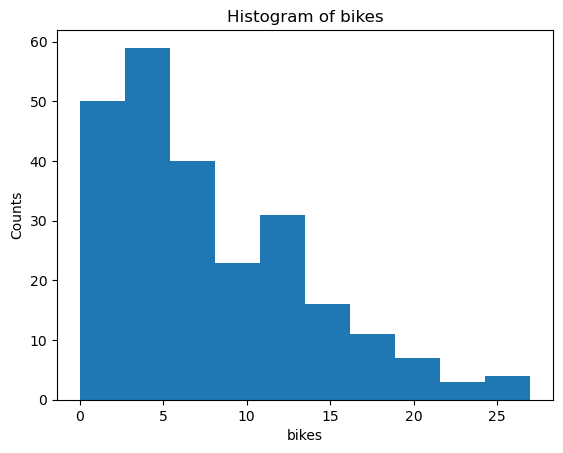

In [26]:

import matplotlib.pyplot as plt

# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots()

# Plot the data using one of Matplotlib's plotting functions
ax.hist(df_combine['bikes'])

# Customize other aspects of the plot
ax.set_title('Histogram of bikes')
ax.set_xlabel('bikes')
ax.set_ylabel('Counts')

# Display the plot
plt.show()

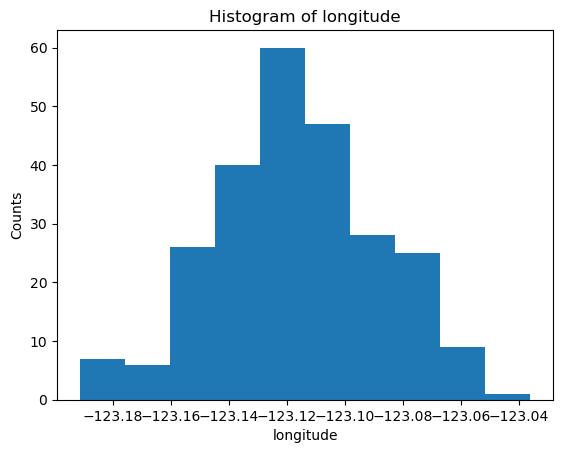

In [27]:

import matplotlib.pyplot as plt

# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots()

# Plot the data using one of Matplotlib's plotting functions
ax.hist(df_combine['longitude'])

# Customize other aspects of the plot
ax.set_title('Histogram of longitude')
ax.set_xlabel('longitude')
ax.set_ylabel('Counts')

# Display the plot
plt.show()

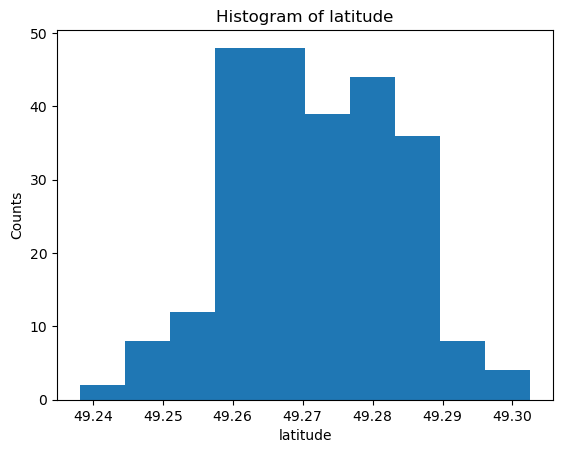

In [28]:

import matplotlib.pyplot as plt

# Create Figure and Axes objects with which to do your plotting
fig, ax = plt.subplots()

# Plot the data using one of Matplotlib's plotting functions
ax.hist(df_combine['latitude'])

# Customize other aspects of the plot
ax.set_title('Histogram of latitude')
ax.set_xlabel('latitude')
ax.set_ylabel('Counts')

# Display the plot
plt.show()

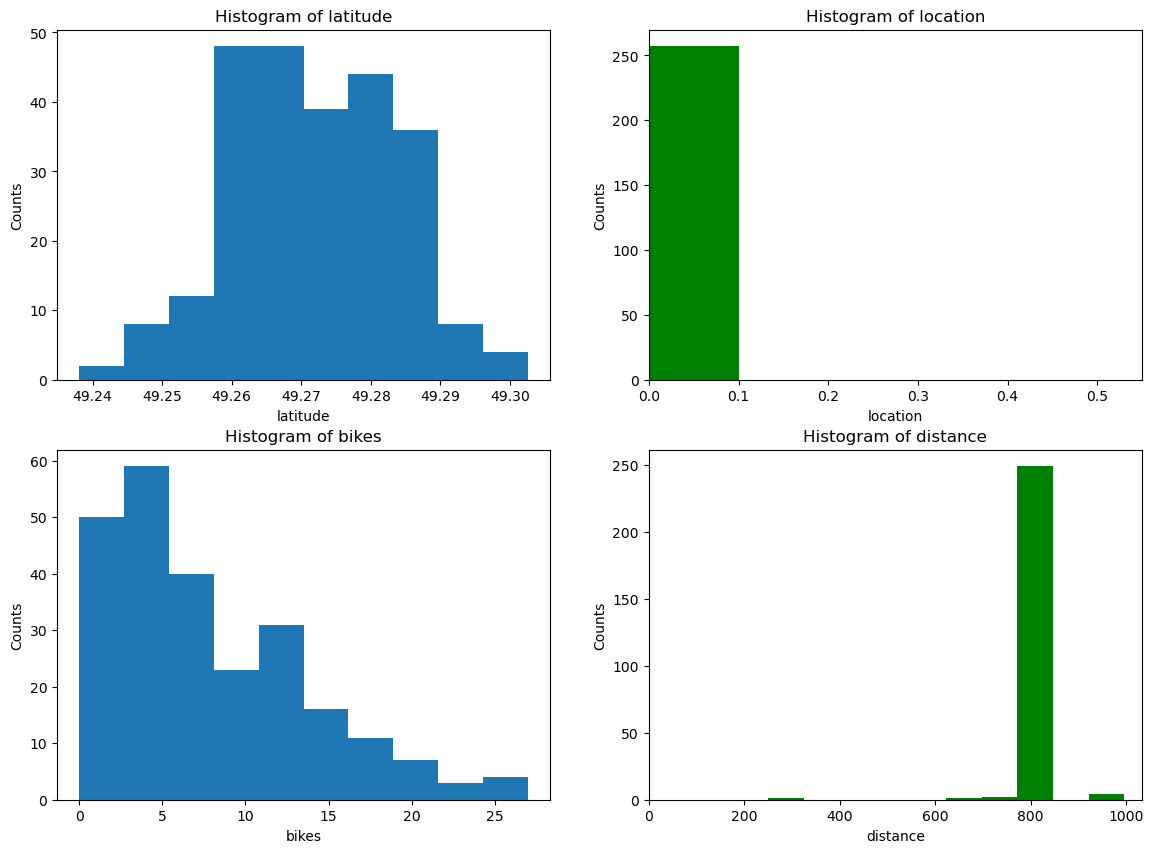

In [29]:
fig, axes = plt.subplots(nrows = 2, 
                         ncols = 2, 
                         figsize=(14, 10)        # units up to debate?
                        )

##Plot 0,0
axes[0,0].hist(df_combine['latitude'])
axes[0,0].set_title('Histogram of latitude')
axes[0,0].set_xlabel('latitude')
axes[0,0].set_ylabel('Counts')

##Plot 0,1
axes[0,1].hist(df_combine['location'], color='green')
axes[0,1].set_title('Histogram of location')
axes[0,1].set_xlabel('location')
axes[0,1].set_ylabel('Counts')
axes[0,1].set_xlim(left=0)
#axes[0,1].set_xlim(right=0)

##Plot 1,0
axes[1,0].hist(df_combine['bikes'])
axes[1,0].set_title('Histogram of bikes')
axes[1,0].set_xlabel('bikes')
axes[1,0].set_ylabel('Counts')

##Plot 1,1
axes[1,1].hist(df_combine['distance'], bins=10, color='green')
axes[1,1].set_title('Histogram of distance')
axes[1,1].set_xlabel('distance')
axes[1,1].set_ylabel('Counts')
axes[1,1].set_xlim(left=0)

plt.show()

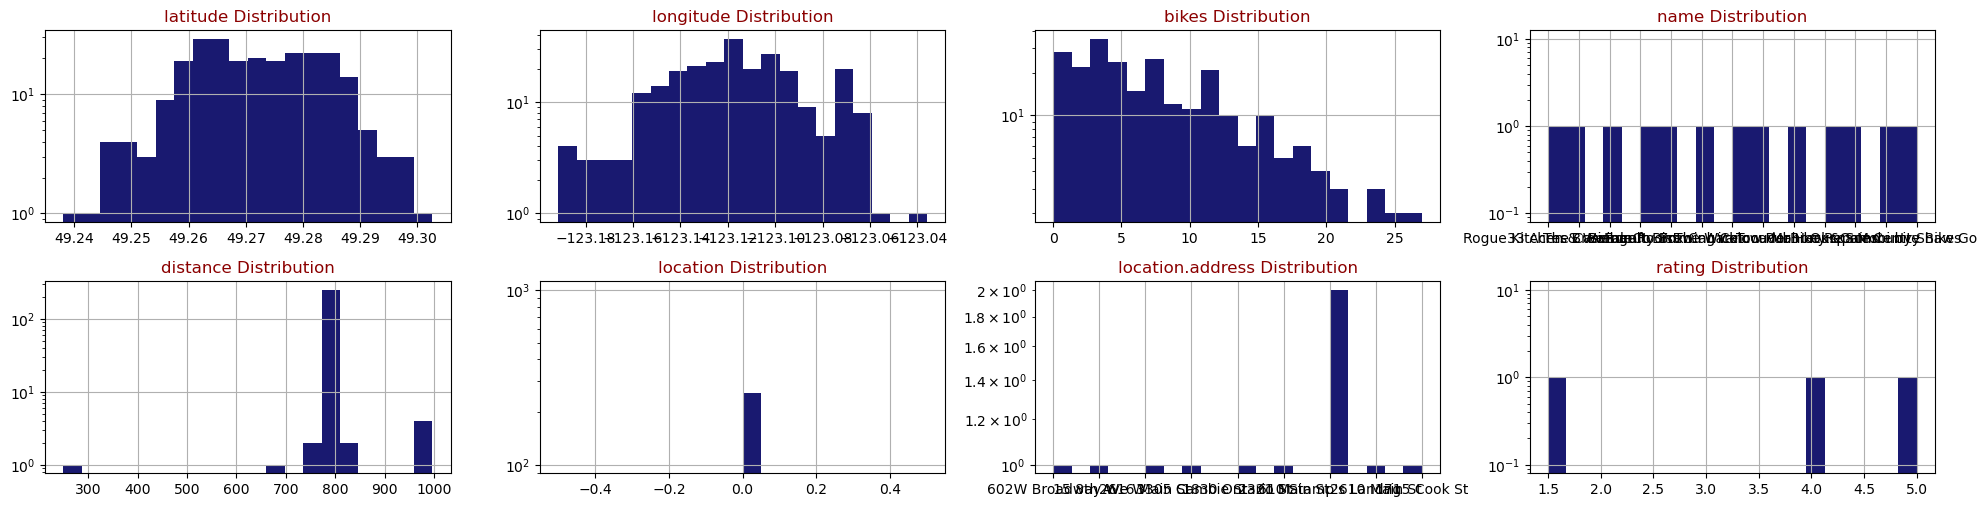

In [30]:
## to create multiple histograms representing each columns
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
draw_histograms(df_combine,df_combine.columns,8,4)

In [31]:
import seaborn as sns

C:\Users\Alex\AppData\Local\Temp\ipykernel_8920\728959383.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_combine.corr(),annot=True)


<Axes: >

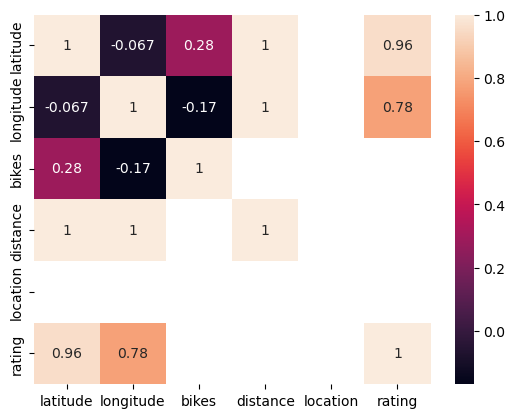

In [19]:
##exploring data using heatmap
sns.heatmap(df_combine.corr(),annot=True)

From the heatmap, bikes is correlated with latitude and longitude. There is positive correlation between bikes and latitude, and negative correlation between bikes and longitude.Therefore there is little linear correlation between bikes and other variables.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [34]:
import sqlite3

conn = sqlite3.connect('../data/data.db')
cursor = conn.cursor()

# cursor.execute("CREATE TABLE citybikes(name, bikes, rating, latitude_x, longitude_x, latitude_y, longitude_y)")

data = []
for _, row in combined_df.iterrows():
    data.append((
        row['name'],
        row['bikes'],
        row['rating'],
        row['latitude_x'],
        row['longitude_x'],
        row['latitude_y'],
        row['longitude_y']
    ))

cursor.executemany("INSERT INTO citybikes VALUES(?, ?, ?, ?, ?, ?, ?)", data)
conn.commit()

# see if data is in there
result = cursor.execute("SELECT * FROM citybikes")
print(result.fetchone())

NameError: name 'combined_df' is not defined

Look at the data before and after the join to validate your data.

## the dataframe is consistent with the dataframe after, nothing lost.